In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/ColabData/data_X.csv")

In [ ]:
df

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103836,2018-12-31 23:56:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,157.20,8.44
2103837,2018-12-31 23:57:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.40,8.44
2103838,2018-12-31 23:58:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.14,8.44
2103839,2018-12-31 23:59:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,162.96,8.44


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(2103841, 18)

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time'] = (df['date_time'] - pd.Timestamp("2014-12-31")) // pd.Timedelta(minutes=1)
df

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,1440,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,1441,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,1442,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,1443,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,1444,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103836,2105276,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,157.20,8.44
2103837,2105277,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.40,8.44
2103838,2105278,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.14,8.44
2103839,2105279,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,162.96,8.44


In [ ]:
df=df[['date_time','T_data_1_1','T_data_1_2','T_data_1_3','T_data_2_1','T_data_2_2','T_data_2_3','T_data_4_1','T_data_4_2','T_data_4_3','T_data_5_1','T_data_5_2','T_data_5_3']]
df

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3
0,1440,212,210,211,347,353,347,346,348,355,241,241,243
1,1441,212,211,211,346,352,346,349,348,355,241,241,243
2,1442,212,211,211,345,352,346,352,349,355,242,241,242
3,1443,213,211,211,344,351,346,355,349,355,242,241,242
4,1444,213,211,211,343,350,346,358,349,355,243,241,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103836,2105276,271,261,265,353,359,353,325,328,328,277,276,280
2103837,2105277,271,261,265,353,359,353,325,328,328,277,276,280
2103838,2105278,271,261,265,353,359,353,325,328,328,277,276,280
2103839,2105279,271,261,265,353,359,353,325,328,328,277,276,280


In [ ]:
df['date_time'] = df['date_time'].diff()

<ipython-input-7-3477a1a201de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = df['date_time'].diff()


In [ ]:
df['date_time'] = df['date_time'].fillna(1)

<ipython-input-8-2962de09f641>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = df['date_time'].fillna(1)


In [ ]:
df

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3
0,1.0,212,210,211,347,353,347,346,348,355,241,241,243
1,1.0,212,211,211,346,352,346,349,348,355,241,241,243
2,1.0,212,211,211,345,352,346,352,349,355,242,241,242
3,1.0,213,211,211,344,351,346,355,349,355,242,241,242
4,1.0,213,211,211,343,350,346,358,349,355,243,241,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103836,1.0,271,261,265,353,359,353,325,328,328,277,276,280
2103837,1.0,271,261,265,353,359,353,325,328,328,277,276,280
2103838,1.0,271,261,265,353,359,353,325,328,328,277,276,280
2103839,1.0,271,261,265,353,359,353,325,328,328,277,276,280


In [ ]:
df1=df[['date_time','T_data_2_1','T_data_2_2','T_data_2_3']]
df4=df[['date_time','T_data_4_1','T_data_4_2','T_data_4_3']]
df5=df[['date_time','T_data_5_1','T_data_5_2','T_data_5_3']]

In [ ]:
df.dropna(inplace= True)

<ipython-input-11-3a41b9131eb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace= True)


In [ ]:
df

,date_time,T_data_2_1,T_data_2_2,T_data_2_3
0,1.0,347,353,347
1,1.0,346,352,346
2,1.0,345,352,346
3,1.0,344,351,346
4,1.0,343,350,346
...,...,...,...,...
2103836,1.0,353,359,353
2103837,1.0,353,359,353
2103838,1.0,353,359,353
2103839,1.0,353,359,353


In [ ]:
df[['T_data_1_1',	'T_data_1_2',	'T_data_1_3']].describe()

,T_data_1_1,T_data_1_2,T_data_1_3
count,2.103841e+06,2.103841e+06,2.103841e+06
mean,2.501822e+02,2.500915e+02,2.502536e+02
std,3.211661e+01,3.082451e+01,3.069125e+01
min,-1.980000e+02,-1.220000e+02,-1.070000e+02
25%,2.290000e+02,2.290000e+02,2.290000e+02
50%,2.500000e+02,2.500000e+02,2.500000e+02
75%,2.720000e+02,2.720000e+02,2.720000e+02
max,7.240000e+02,7.620000e+02,6.650000e+02


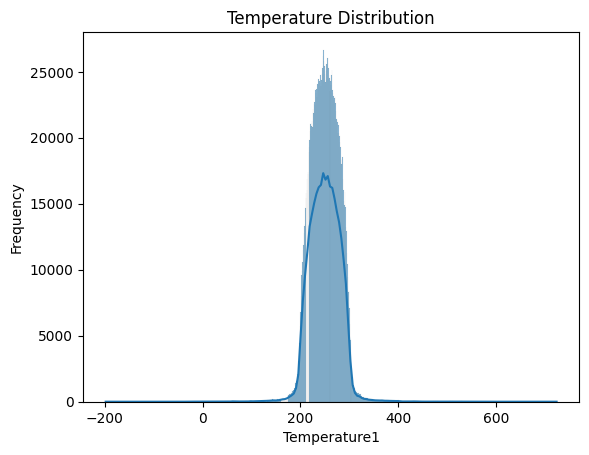

In [ ]:
sns.histplot(df['T_data_1_1'], kde=True)
plt.xlabel("Temperature1")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.show()

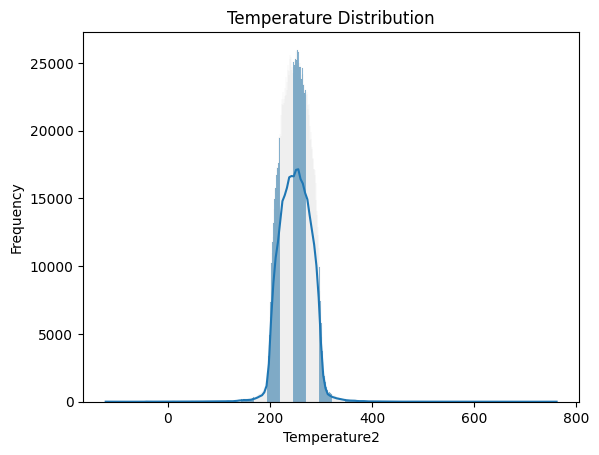

In [ ]:
sns.histplot(df['T_data_1_2'], kde=True)
plt.xlabel("Temperature2")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.show()

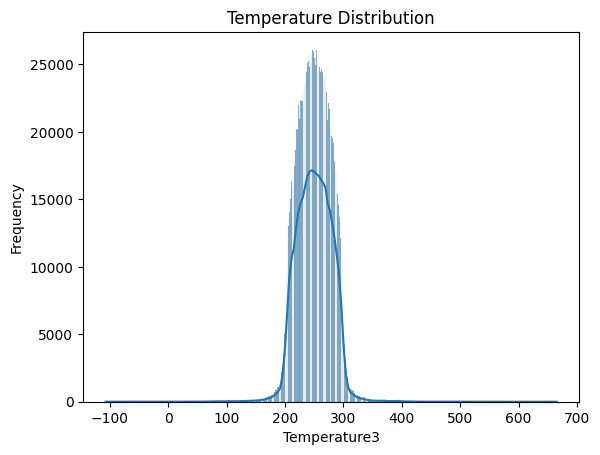

In [ ]:
sns.histplot(df['T_data_1_3'], kde=True)
plt.xlabel("Temperature3")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.show()

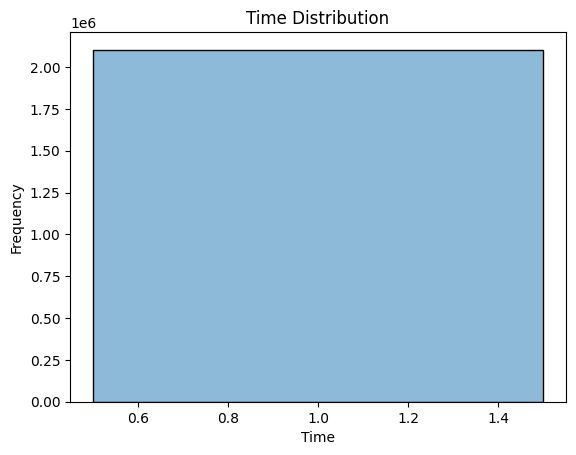

In [ ]:
sns.histplot(df['date_time'], kde=True)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Time Distribution")
plt.show()

In [ ]:
scaler = StandardScaler()

In [ ]:

df[['date_time',	'T_data_4_1',	'T_data_4_2',	'T_data_4_3']] = scaler.fit_transform(df[['date_time',	'T_data_4_1',	'T_data_4_2',	'T_data_4_3']])

In [ ]:
df1[['date_time',	'T_data_2_1',	'T_data_2_2',	'T_data_2_3']] = scaler.fit_transform(df1[['date_time',	'T_data_2_1',	'T_data_2_2',	'T_data_2_3']])
df4[['date_time',	'T_data_4_1',	'T_data_4_2',	'T_data_4_3']] = scaler.fit_transform(df4[['date_time',	'T_data_4_1',	'T_data_4_2',	'T_data_4_3']])
df5[['date_time',	'T_data_5_1',	'T_data_5_2',	'T_data_5_3']] = scaler.fit_transform(df5[['date_time',	'T_data_5_1',	'T_data_5_2',	'T_data_5_3']])

<ipython-input-12-1bbc91ff0878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['date_time',	'T_data_2_1',	'T_data_2_2',	'T_data_2_3']] = scaler.fit_transform(df1[['date_time',	'T_data_2_1',	'T_data_2_2',	'T_data_2_3']])
<ipython-input-12-1bbc91ff0878>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[['date_time',	'T_data_4_1',	'T_data_4_2',	'T_data_4_3']] = scaler.fit_transform(df4[['date_time',	'T_data_4_1',	'T_data_4_2',	'T_data_4_3']])
<ipython-input-12-1bbc91ff0878>:3: SettingWithCopyWarning:

In [ ]:
df


,date_time,T_data_4_1,T_data_4_2,T_data_4_3
0,0.0,-0.084457,-0.036709,0.123684
1,0.0,-0.008132,-0.036709,0.123684
2,0.0,0.068193,-0.011199,0.123684
3,0.0,0.144518,-0.011199,0.123684
4,0.0,0.220843,-0.011199,0.123684
...,...,...,...,...
2103836,0.0,-0.618731,-0.546914,-0.548232
2103837,0.0,-0.618731,-0.546914,-0.548232
2103838,0.0,-0.618731,-0.546914,-0.548232
2103839,0.0,-0.618731,-0.546914,-0.548232


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df5, test_size=0.2, random_state=42)
X_test, X_val = train_test_split(X_test, test_size=0.5, random_state=42)


In [ ]:
def generate_synthetic_anomalies_by_room(df, anomaly_fraction=0.3, random_state=42):
    """
    Injects synthetic anomalies (Network=0, Security=1, Sensor=2) per room.
    Applies only to temperature sensors. Humidity sensors (e.g., starting with 'H_') are ignored.
    """
    import numpy as np
    import re

    np.random.seed(random_state)
    df = df.copy()
    df['Anomaly_Type'] = -1

    # Identify all temperature columns (assume humidity starts with 'H_')
    temp_cols = [col for col in df.columns if col.startswith('T_') or 'temp' in col.lower()]

    # Group temperature columns by room using regex
    room_dict = {}
    for col in temp_cols:
        match = re.search(r'T.*?_(\d+)_', col)
        if match:
            room_id = match.group(1)
            room_dict.setdefault(room_id, []).append(col)

    total_rows = len(df)
    total_anomalies = int(anomaly_fraction * total_rows)

    # Distribute anomalies evenly across rooms
    rooms = list(room_dict.keys())
    anomalies_per_room = total_anomalies // len(rooms)

    for room_id, room_cols in room_dict.items():
        if not room_cols:
            continue

        # Determine indices for this room
        idxs = np.random.choice(df.index, size=anomalies_per_room, replace=False)
        k_net, k_sec, k_sen = anomalies_per_room // 3, anomalies_per_room // 3, anomalies_per_room - 2 * (anomalies_per_room // 3)

        net_idxs = idxs[:k_net]
        sec_idxs = idxs[k_net:k_net + k_sec]
        sen_idxs = idxs[k_net + k_sec:]

        # Network anomaly — date_time skew
        dt_max = df['date_time'].max()
        df.loc[net_idxs, 'date_time'] = dt_max + np.arange(1, k_net + 1) * 0.005
        df.loc[net_idxs, 'Anomaly_Type'] = 0

        # Security anomaly — zero out all temperature sensors in the room
        df.loc[sec_idxs, room_cols] = 0
        df.loc[sec_idxs, 'Anomaly_Type'] = 1

        # Sensor anomaly — alternating extremes for each sensor
        for col in room_cols:
            max_val = df[col].max()
            min_val = df[col].min()

            alt_mask = np.arange(len(sen_idxs)) % 2 == 0
            even_idxs = sen_idxs[alt_mask]
            odd_idxs = sen_idxs[~alt_mask]

            df.loc[even_idxs, col] = max_val + 50
            df.loc[odd_idxs, col] = min_val - 50

        df.loc[sen_idxs, 'Anomaly_Type'] = 2

    return df


In [ ]:
df_anom = generate_synthetic_anomalies_by_room(X_test,)

In [ ]:
df_anom

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,Anomaly_Type
199583,1.000,299,293,293,329,337,329,370,371,378,0,0,0,1
635142,1.000,268,273,277,319,312,327,362,361,361,242,236,231,-1
1662603,1.000,239,242,256,344,338,344,360,355,376,289,292,291,-1
901009,1.000,281,279,287,366,360,362,354,365,352,229,236,226,-1
1130596,1.000,-247,-171,-157,383,526,391,345,338,570,261,262,247,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015237,1.000,295,276,292,1352,1229,935,319,297,316,270,237,276,2
1606210,1.000,208,199,228,364,375,373,391,336,334,239,240,243,-1
632823,62.060,305,261,265,0,0,0,339,334,327,235,217,218,0
1514334,2.305,248,245,248,333,335,346,341,324,349,244,238,249,0


In [ ]:
df_anom.to_csv('/content/drive/My Drive/ColabData/data_X_anom.csv', index=False)

In [ ]:
len(X_train)

1683072

In [ ]:
len(X_test)

210384

In [ ]:
len(X_val)

210385

In [ ]:
autoencoder = keras.Sequential([
    layers.Dense(3, activation="relu", input_shape=(4,)),
    layers.Dense(2, activation="relu"),
    layers.Dense(3, activation="relu"),
    layers.Dense(4, activation="linear")
])

autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48 (192.00 B)

 Trainable params: 48 (192.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(X_train, X_train, epochs=40, batch_size=50, validation_data=(X_val, X_val))

Epoch 1/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - loss: 0.2113 - val_loss: 0.1726
Epoch 2/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 0.1698 - val_loss: 0.1720
Epoch 3/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 140s 2ms/step - loss: 0.1677 - val_loss: 0.1721
Epoch 4/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 0.1698 - val_loss: 0.1719
Epoch 5/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.1688 - val_loss: 0.1719
Epoch 6/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - loss: 0.1683 - val_loss: 0.1720
Epoch 7/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 139s 2ms/step - loss: 0.1694 - val_loss: 0.1718
Epoch 8/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 0.1688 - val_loss: 0.1718
Epoch 9/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.1689 - val_loss: 0.1721
Epoch 10/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - loss: 0.1686 - val_loss: 0.1719
Epoch 11/40
33662/33662 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.1696 - val_loss: 0

Evaluating the model's performance

In [ ]:
autoencoder.save('/content/drive/My Drive/ColabData/autoencoder_modelG1Room5.keras')

In [ ]:
from tensorflow.keras.models import load_model
autoencoder=load_model('/content/drive/My Drive/ColabData/autoencoder_modelG1.keras')
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (588.00 B)

 Trainable params: 48 (192.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 98 (396.00 B)

In [ ]:
temperature1=list(X_test['T_data_1_1'])
temperature2=list(X_test['T_data_1_2'])
temperature3=list(X_test['T_data_1_3'])
date_time=list(X_test['date_time'])
anomaly_type=list(np.zeros(len(X_test)))
#network failure
for i in range(0, len(X_test)//3):
    date_time[i]=X_test['date_time'].max() + i*0.005
#security attack
for i in range(len(X_test)//3, 2*len(X_test)//3):
    temperature1[i]=0
    temperature2[i]=0
    temperature3[i]=0
    anomaly_type[i]=1
#sensor failure
for i in range(2*len(X_test)//3, len(X_test)):
    temperature1[i]=(X_test['T_data_1_1'].max() if i % 2 == 0 else X_test['T_data_1_1'].min())
    temperature2[i]=(X_test['T_data_1_2'].max() + 100)
    temperature3[i]=(X_test['T_data_1_3'].min() - 100)
    anomaly_type[i]=2

In [ ]:
X_test2_d={'date_time':date_time,'T_data_1_1':temperature1,'T_data_1_2':temperature2,'T_data_1_3':temperature3,'Anomaly_Type':anomaly_type}
X_test2=pd.DataFrame(X_test2_d)
X_test2

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,Anomaly_Type
0,0.000,1.520018,1.392025,1.392789,0.0
1,0.005,0.554785,0.743191,0.871467,0.0
2,0.010,-0.348175,-0.262503,0.187233,0.0
3,0.015,0.959560,0.937841,1.197293,0.0
4,0.020,1.302062,0.970283,1.392789,0.0
...,...,...,...,...,...
210379,0.000,-13.923708,116.607194,-111.640244,2.0
210380,0.000,14.753050,116.607194,-111.640244,2.0
210381,0.000,-13.923708,116.607194,-111.640244,2.0
210382,0.000,14.753050,116.607194,-111.640244,2.0


In [ ]:
X_anom=X_test2
X_test2=X_test2.drop('Anomaly_Type',axis=1)

In [ ]:
X_test

,date_time,T_data_1_1,T_data_1_2,T_data_1_3
199583,0.0,1.520018,1.392025,1.392789
635142,0.0,0.554785,0.743191,0.871467
1662603,0.0,-0.348175,-0.262503,0.187233
901009,0.0,0.959560,0.937841,1.197293
1130596,0.0,1.302062,0.970283,1.392789
...,...,...,...,...
1015237,0.0,1.395472,0.840516,1.360206
1606210,0.0,-1.313407,-1.657497,-0.725079
632823,0.0,1.706837,0.353890,0.480476
1514334,0.0,-0.067946,-0.165177,-0.073427


In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
err=np.sum(np.square(X_test - autoencoder.predict(X_test)),axis=1)/4
X_test['error']=err


6575/6575 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


In [ ]:
err2=np.sum(np.square(X_test2 - autoencoder.predict(X_test2)),axis=1)/4
X_test2['error']=err2
X_test2['Anomaly_Type']=anomaly_type

6575/6575 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [ ]:
X_test2

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,error,Anomaly_Type
0,0.000,1.520018,1.392025,1.392789,0.002625,0.0
1,0.005,0.554785,0.743191,0.871467,0.012732,0.0
2,0.010,-0.348175,-0.262503,0.187233,0.038656,0.0
3,0.015,0.959560,0.937841,1.197293,0.009140,0.0
4,0.020,1.302062,0.970283,1.392789,0.022289,0.0
...,...,...,...,...,...,...
210379,0.000,-13.923708,116.607194,-111.640244,6562.977570,2.0
210380,0.000,14.753050,116.607194,-111.640244,6538.584794,2.0
210381,0.000,-13.923708,116.607194,-111.640244,6562.977570,2.0
210382,0.000,14.753050,116.607194,-111.640244,6538.584794,2.0


In [ ]:
X_test2=X_test2.drop('error',axis=1)
X_test=X_test.drop('error',axis=1)

In [ ]:
X_test2=X_test2.drop('Anomaly_Type',axis=1)

In [ ]:
X_test_pred = autoencoder.predict(X_test2)
reconstruction_error = np.square(X_test2.values - X_test_pred)


6575/6575 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [ ]:

error_mean = np.mean(reconstruction_error, axis=1)
error_std = np.std(reconstruction_error, axis=1)
error_max = np.max(reconstruction_error, axis=1)
error_min = np.min(reconstruction_error, axis=1)

error_features = np.column_stack((error_mean, error_std, error_max, error_min))



**PIPELINE TEST**





advanced generation of anomalies


test2 xgboost

In [ ]:
import numpy as np
import pandas as pd

def generate_synthetic_anomalies(X_val):
    """
    Generates synthetic anomalies: Network (0), Security (1), Sensor Failure (2)
    based on input DataFrame X_val.
    """
    n = len(X_val)

    # Extract original values
    temperature1 = list(X_val['T_data_1_1'])
    temperature2 = list(X_val['T_data_1_2'])
    temperature3 = list(X_val['T_data_1_3'])
    date_time = list(X_val['date_time'])
    anomaly_type = list(np.zeros(n))

    # 1. Network Failure: Increase time interval sharply
    for i in range(0, n // 3):
        date_time[i] = X_val['date_time'].max() + i * 0.005
        anomaly_type[i] = 0  # Optional: explicitly set

    # 2. Security Attack: All sensors flatline to zero
    for i in range(n // 3, 2 * n // 3):
        temperature1[i] = 0
        temperature2[i] = 0
        temperature3[i] = 0
        anomaly_type[i] = 1

    # 3. Sensor Failure: Extreme and alternating values
    for i in range(2 * n // 3, n):
        temperature1[i] = X_val['T_data_1_1'].max() if i % 2 == 0 else X_val['T_data_1_1'].min()
        temperature2[i] = X_val['T_data_1_2'].max() + 100
        temperature3[i] = X_val['T_data_1_3'].min() - 100
        anomaly_type[i] = 2

    # Create synthetic anomaly DataFrame
    df_anom = pd.DataFrame({
        'T_data_1_1': temperature1,
        'T_data_1_2': temperature2,
        'T_data_1_3': temperature3,
        'date_time': date_time,
        'Anomaly_Type': anomaly_type
    })

    return df_anom


In [ ]:
df_anom=generate_synthetic_anomalies(X_test)

KeyboardInterrupt: 

In [ ]:
df_anom

19724/19724 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:03:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
                precision    recall  f1-score   support

       Network       1.00      1.00      1.00    210384
      Security       1.00      1.00      1.00    210384
Sensor Failure       1.00      1.00      1.00    210384

      accuracy                           1.00    631152
     macro avg       1.00      1.00      1.00    631152
  weighted avg       1.00      1.00      1.00    631152

Accuracy: 0.9997496641062692


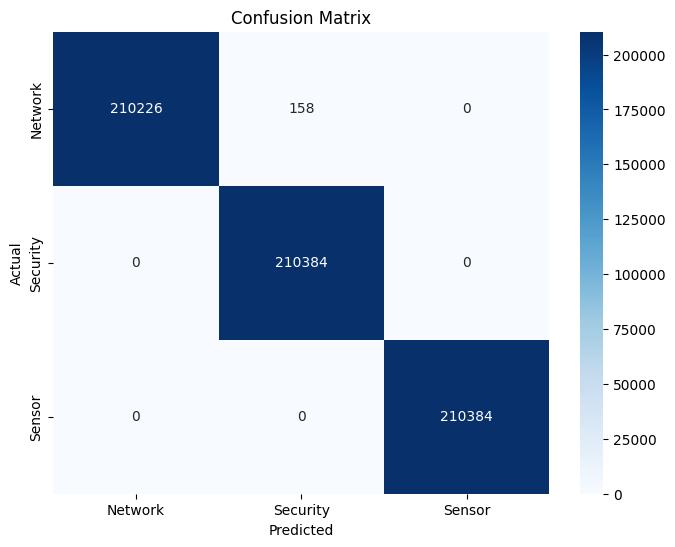

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Ground truth
true_labels = df_anom['Anomaly_Type'].values

# Prepare input features (autoencoder reconstruction error stats)
X = df_anom.drop('Anomaly_Type', axis=1)
X=X.drop('error',axis=1)
X_pred = autoencoder.predict(X)
errors = np.square(X - X_pred)

# Feature engineering
error_mean = errors.mean(axis=1)
error_std = errors.std(axis=1)
error_max = errors.max(axis=1)
error_min = errors.min(axis=1)

error_features = np.stack([error_mean, error_std, error_max, error_min], axis=1)

# Train XGBoost
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
clf.fit(error_features, true_labels)
clf.save_model("xgb_anomaly_classifier.json")
# Predict and evaluate
y_pred = clf.predict(error_features)

print("Classification Report:")
print(classification_report(true_labels, y_pred, target_names=["Network", "Security", "Sensor Failure"]))
print("Accuracy:", accuracy_score(true_labels, y_pred))

# Confusion Matrix
conf_matrix = pd.crosstab(pd.Series(true_labels, name='Actual'),
                          pd.Series(y_pred, name='Predicted'))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Network", "Security", "Sensor"],
            yticklabels=["Network", "Security", "Sensor"])
plt.title("Confusion Matrix")
plt.show()


test xgboost

In [ ]:
X_val_test = X_val.sample(frac=1, random_state=99).reset_index(drop=True)  # Shuffle original normal data
df_test_anom = generate_synthetic_anomalies(X_val_test)


In [ ]:
X_test_pred = autoencoder.predict(df_test_anom.drop('Anomaly_Type', axis=1))
X_test = df_test_anom.drop('Anomaly_Type', axis=1)
errors_test = np.square(X_test - X_test_pred)

error_mean = errors_test.mean(axis=1)
error_std = errors_test.std(axis=1)
error_max = errors_test.max(axis=1)
error_min = errors_test.min(axis=1)

test_features = np.stack([error_mean, error_std, error_max, error_min], axis=1)


6575/6575 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [ ]:
true_test_labels = df_test_anom['Anomaly_Type'].values
predicted_labels = clf.predict(test_features)


Evaluation on Unseen Test Anomalies:
                precision    recall  f1-score   support

       Network       1.00      1.00      1.00     70128
      Security       1.00      1.00      1.00     70128
Sensor Failure       1.00      1.00      1.00     70129

      accuracy                           1.00    210385
     macro avg       1.00      1.00      1.00    210385
  weighted avg       1.00      1.00      1.00    210385

Accuracy: 0.9999809872376832


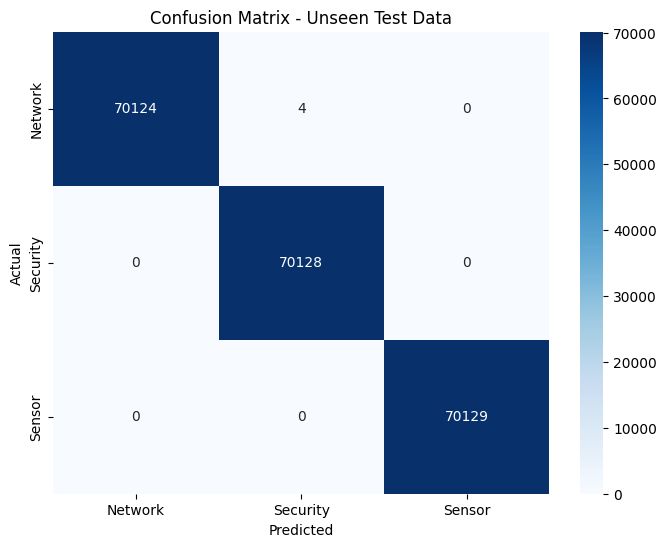

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Evaluation on Unseen Test Anomalies:")
print(classification_report(true_test_labels, predicted_labels,
                            target_names=["Network", "Security", "Sensor Failure"]))
print("Accuracy:", accuracy_score(true_test_labels, predicted_labels))

# Optional: Confusion matrix
conf_matrix = pd.crosstab(pd.Series(true_test_labels, name='Actual'),
                          pd.Series(predicted_labels, name='Predicted'))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Network", "Security", "Sensor"],
            yticklabels=["Network", "Security", "Sensor"])
plt.title("Confusion Matrix - Unseen Test Data")
plt.show()


In [ ]:
def generate_synthetic_anomalies_fast(X_val, anomaly_fraction=0.3, random_state=42):
    """
    Optimized anomaly injection: Network (0), Security (1), Sensor (2)
    """
    np.random.seed(random_state)
    df = X_val.copy()
    df['Anomaly_Type'] = -1

    n = len(df)
    k = int(anomaly_fraction * n)
    k_net, k_sec, k_sen = k // 3, k // 3, k - 2 * (k // 3)

    # Sample indices
    anomaly_indices = np.random.choice(df.index, size=k, replace=False)
    net_idxs = anomaly_indices[:k_net]
    sec_idxs = anomaly_indices[k_net:k_net + k_sec]
    sen_idxs = anomaly_indices[k_net + k_sec:]

    # Network failure: increase date_time
    dt_max = df['date_time'].max()
    df.loc[net_idxs, 'date_time'] = dt_max + np.arange(1, k_net + 1) * 0.005
    df.loc[net_idxs, 'Anomaly_Type'] = 0

    # Security attack: zero out all temperatures
    df.loc[sec_idxs, ['T_data_1_1', 'T_data_1_2', 'T_data_1_3']] = 0
    df.loc[sec_idxs, 'Anomaly_Type'] = 1

    # Sensor failure: use vectorized extreme setting
    t1_max = df['T_data_1_1'].max()
    t1_min = df['T_data_1_1'].min()
    t2_max = df['T_data_1_2'].max()
    t3_min = df['T_data_1_3'].min()

    # Alternate values using vectorized indexing
    alt_mask = np.arange(len(sen_idxs)) % 2 == 0
    sen_idxs_even = sen_idxs[alt_mask]
    sen_idxs_odd = sen_idxs[~alt_mask]

    df.loc[sen_idxs_even, 'T_data_1_1'] = t1_max
    df.loc[sen_idxs_odd, 'T_data_1_1'] = t1_min
    df.loc[sen_idxs, 'T_data_1_2'] = t2_max + 100
    df.loc[sen_idxs, 'T_data_1_3'] = t3_min - 100
    df.loc[sen_idxs, 'Anomaly_Type'] = 2

    return df


In [ ]:
df_anom=generate_synthetic_anomalies_fast(df)
df_anom

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,Anomaly_Type
0,0.0,14.753050,116.607194,-111.640244,2
1,0.0,-1.188861,-1.268196,-1.278983,-1
2,0.0,-1.188861,-1.268196,-1.278983,-1
3,0.0,-13.954845,116.607194,-111.640244,2
4,0.0,-1.157725,-1.268196,-1.278983,-1
...,...,...,...,...,...
2103836,0.0,0.648195,0.353890,0.480476,-1
2103837,0.0,0.648195,0.353890,0.480476,-1
2103838,0.0,0.648195,0.353890,0.480476,-1
2103839,0.0,0.648195,0.353890,0.480476,-1


In [ ]:
df_anom['error']=np.mean(np.square(df_anom.drop('Anomaly_Type',axis=1)-autoencoder.predict(df_anom.drop('Anomaly_Type',axis=1))),axis=1)

6575/6575 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [ ]:
df_anom[df_anom['Anomaly_Type'] == -1]['error'].describe()


,error
count,1.472689e+06
mean,1.667248e-01
std,9.495226e-01
min,1.500052e-07
25%,5.283366e-03
50%,1.626329e-02
75%,5.653870e-02
max,4.139733e+01


In [ ]:
df_anom[df_anom['Anomaly_Type'] != -1]['error'].describe()


,error
count,631152.000000
mean,32926.690941
std,63506.091227
min,0.000310
25%,0.000310
50%,6538.584794
75%,17305.425489
max,276651.503354


In [ ]:
test = df_anom[(df_anom['error'] > 0.000310) & (df_anom['error'] < 41.4)]
test

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,Anomaly_Type,error
1,0.0,-1.188861,-1.268196,-1.278983,-1,0.001148
2,0.0,-1.188861,-1.268196,-1.278983,-1,0.001148
4,0.0,-1.157725,-1.268196,-1.278983,-1,0.001858
5,0.0,-1.157725,-1.268196,-1.278983,-1,0.001858
6,0.0,-1.157725,-1.235754,-1.278983,-1,0.002176
...,...,...,...,...,...,...
2103836,0.0,0.648195,0.353890,0.480476,-1,0.008870
2103837,0.0,0.648195,0.353890,0.480476,-1,0.008870
2103838,0.0,0.648195,0.353890,0.480476,-1,0.008870
2103839,0.0,0.648195,0.353890,0.480476,-1,0.008870


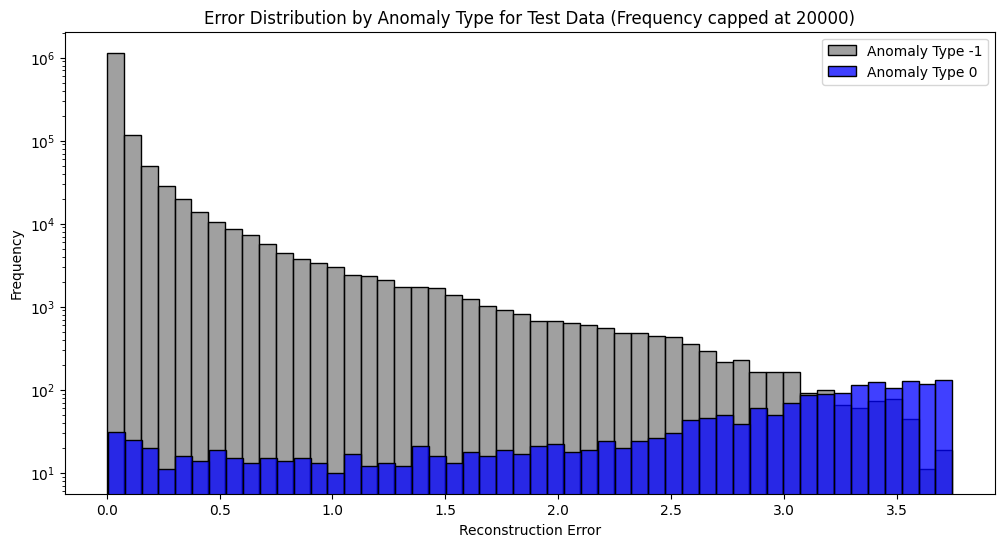

In [ ]:
# prompt: generate the plot for distrbution of error of 'test' for each anomaly type

plt.figure(figsize=(12, 6))

# Define colors for each anomaly type
colors = {
    -1: 'grey',  # Normal data points
    0: 'blue',
    1: 'red',
    2: 'green'
}

# Plot error distribution for each anomaly type
for anomaly_type in test['Anomaly_Type'].unique():
    subset = test[test['Anomaly_Type'] == anomaly_type]
    sns.histplot(np.log1p(subset['error']), label=f'Anomaly Type {int(anomaly_type)}', kde=False, color=colors[anomaly_type], bins=50)


plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution by Anomaly Type for Test Data (Frequency capped at 20000)')
plt.yscale('log') # Use log scale for better visualization if needed
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

# 1: Predict and get reconstruction errors
#reconstructions = autoencoder.predict(X_test)
#reconstruction_errors = np.mean(np.square(X_test - reconstructions), axis=1)

#  2: Apply your threshold
normal_errors = df_anom[df_anom['Anomaly_Type'] == -1]['error']
threshold = normal_errors.mean() + 3 * normal_errors.std()
y_pred = df_anom['error'] > threshold

# 3: Convert your multiclass labels to binary (1 = anomaly, 0 = normal)
y_binary = np.where(df_anom['Anomaly_Type'] == -1, 0, 1)  # 0 for normal, 1 for any anomaly

# Step 4: Calculate metrics
precision = precision_score(y_binary, y_pred)
recall = recall_score(y_binary, y_pred)
f1 = f1_score(y_binary, y_pred)
accuracy = accuracy_score(y_binary, y_pred)
cm = confusion_matrix(y_binary, y_pred)

# Step 5: Print results
print(f"Threshold: {threshold}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-score:  {f1:.2f}")
print(f"Accuracy:  {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)


Threshold: 3
Precision: 0.97
Recall:    0.67
F1-score:  0.79
Accuracy:  0.89
Confusion Matrix:
[[1457652   15037]
 [ 210679  420473]]


In [ ]:
from xgboost import XGBClassifier

clf_loaded = XGBClassifier()
clf_loaded.load_model("/content/drive/My Drive/ColabData/xgb_anomaly_classifier.json")


In [ ]:
import numpy as np
import pandas as pd

def generate_behavioral_anomalies(df, anomaly_fraction=0.1, random_state=42):
    """
    Generates realistic behavior-based anomalies:
    - Network (0): irregular time steps
    - Security (1): all sensors affected
    - Sensor (2): only one sensor affected
    """
    np.random.seed(random_state)
    df = df.copy()  # We'll keep this to prevent mutation of the original df
    n = len(df)
    k = int(anomaly_fraction * n)
    k_net, k_sec, k_sen = k // 3, k // 3, k - 2 * (k // 3)

    # Precompute random indices for anomalies
    anomaly_indices = np.random.choice(df.index, size=k, replace=False)
    net_idxs = anomaly_indices[:k_net]
    sec_idxs = anomaly_indices[k_net:k_net + k_sec]
    sen_idxs = anomaly_indices[k_net + k_sec:]

    # --- Network Anomalies (0) ---
    # Use numpy for efficient timestamp modification
    df.loc[net_idxs, 'date_time'] += np.random.uniform(0.1, 1.0, size=k_net)
    df.loc[net_idxs, 'Anomaly_Type'] = 0

    # --- Security Anomalies (1) ---
    # Efficiently generate and apply changes to the entire row at once
    sec_offsets = np.random.normal(loc=10, scale=5, size=k_sec)
    sec_noise = np.random.normal(0, 0.5, size=(k_sec, 3))  # Generate noise for 3 sensors at once
    df.loc[sec_idxs, ['T_data_1_1', 'T_data_1_2', 'T_data_1_3']] += sec_offsets[:, None] + sec_noise
    df.loc[sec_idxs, 'Anomaly_Type'] = 1

    # --- Sensor Failures (2) ---
    # Generate random sensor anomalies for the affected indices
    sensor_cols = ['T_data_1_1', 'T_data_1_2', 'T_data_1_3']
    sensor_modes = ['drift', 'spike', 'stuck']
    sen_sensor_choices = np.random.choice(sensor_cols, size=k_sen)
    sen_modes = np.random.choice(sensor_modes, size=k_sen)

    # Apply sensor anomaly changes in bulk for better performance
    for idx, sensor, mode in zip(sen_idxs, sen_sensor_choices, sen_modes):
        if mode == 'drift':
            df.loc[idx, sensor] += np.random.normal(5, 2)
        elif mode == 'spike':
            df.loc[idx, sensor] = np.random.choice([100, -100])
        elif mode == 'stuck':
            df.loc[idx, sensor] = np.random.choice([42, -10, 0])
        df.loc[idx, 'Anomaly_Type'] = 2

    return df


In [ ]:
df_anom = generate_behavioral_anomalies(X_test, anomaly_fraction=0.1)
df_anom

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,Anomaly_Type
199583,0.000000,1.520018,1.392025,1.392789,NaN
635142,0.000000,0.554785,0.743191,0.871467,NaN
1662603,0.000000,-0.348175,-0.262503,0.187233,NaN
901009,0.000000,0.959560,0.937841,1.197293,NaN
1130596,0.000000,16.814943,15.299454,16.723331,1.0
...,...,...,...,...,...
1015237,0.000000,1.395472,0.840516,1.360206,NaN
1606210,0.000000,-1.313407,-1.657497,-0.725079,NaN
632823,0.000000,1.706837,0.353890,0.480476,NaN
1514334,0.534788,-0.067946,-0.165177,-0.073427,0.0


In [ ]:
df_anom['Anomaly_Type']=df_anom['Anomaly_Type'].fillna(-1)

In [ ]:
df_anom

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,Anomaly_Type
199583,0.000000,1.520018,1.392025,1.392789,-1.0
635142,0.000000,0.554785,0.743191,0.871467,-1.0
1662603,0.000000,-0.348175,-0.262503,0.187233,-1.0
901009,0.000000,0.959560,0.937841,1.197293,-1.0
1130596,0.000000,16.814943,15.299454,16.723331,1.0
...,...,...,...,...,...
1015237,0.000000,1.395472,0.840516,1.360206,-1.0
1606210,0.000000,-1.313407,-1.657497,-0.725079,-1.0
632823,0.000000,1.706837,0.353890,0.480476,-1.0
1514334,0.534788,-0.067946,-0.165177,-0.073427,0.0


In [ ]:
df_anom['error']=np.mean(np.square(df_anom.drop('Anomaly_Type',axis=1)-autoencoder.predict(df_anom.drop('Anomaly_Type',axis=1))),axis=1)

6575/6575 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [ ]:
df_anom_save=df_anom

In [ ]:
df_anom=df_anom_save[df_anom_save['Anomaly_Type']!=-1]

In [ ]:
df_anom

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,Anomaly_Type,error
1130596,0.000000,16.814943,15.299454,16.723331,1.0,101.037516
1574741,0.000000,18.692277,18.699546,18.183664,1.0,143.514354
331581,0.000000,9.699310,7.804709,8.584990,1.0,12.486323
1278177,0.000000,1.767881,-0.100294,0.154651,2.0,0.503823
528192,0.000000,17.404053,16.210084,16.228324,1.0,106.809863
...,...,...,...,...,...,...
1996045,0.000000,10.400462,10.534491,10.750246,1.0,25.835318
570384,0.865947,0.430239,-0.197619,0.122068,0.0,1.011359
2043548,0.298739,1.177516,1.100050,0.904050,0.0,0.126330
1514334,0.534788,-0.067946,-0.165177,-0.073427,0.0,0.369536


In [ ]:
df_anom

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,Anomaly_Type
1130596,0.000000,16.814943,15.299454,16.723331,1.0
1574741,0.000000,18.692277,18.699546,18.183664,1.0
331581,0.000000,9.699310,7.804709,8.584990,1.0
1278177,0.000000,1.767881,-0.100294,0.154651,2.0
528192,0.000000,17.404053,16.210084,16.228324,1.0
...,...,...,...,...,...
1996045,0.000000,10.400462,10.534491,10.750246,1.0
570384,0.865947,0.430239,-0.197619,0.122068,0.0
2043548,0.298739,1.177516,1.100050,0.904050,0.0
1514334,0.534788,-0.067946,-0.165177,-0.073427,0.0


In [ ]:
reconstruction_error=np.square(df_anom.drop('Anomaly_Type',axis=1)-autoencoder.predict(df_anom.drop('Anomaly_Type',axis=1)))
error_mean = np.mean(reconstruction_error, axis=1)
error_std = np.std(reconstruction_error, axis=1)
error_max = np.max(reconstruction_error, axis=1)
error_min = np.min(reconstruction_error, axis=1)

error_features = np.column_stack((error_mean, error_std, error_max, error_min))

658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Error-based features for Stage 1 (you already computed these)
df_anom['error_mean'] = error_mean
df_anom['error_std'] = error_std
df_anom['error_max'] = error_max
df_anom['error_min'] = error_min

error_features = ['error_mean', 'error_std', 'error_max', 'error_min']

# Original sensor features for Stage 2
sensor_features = ['T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'date_time']



In [ ]:
# Stage 1 labels: 0 = Network, 1 = Other (Sensor/Security)
df_anom['stage1_label'] = (df_anom['Anomaly_Type'] != 0).astype(int)
stage1_df = df_anom[df_anom['Anomaly_Type'] != -1]

X_stage1 = stage1_df[error_features]
y_stage1 = stage1_df['stage1_label']

# Handle imbalance
num_network = np.sum(y_stage1 == 0)
num_other = np.sum(y_stage1 == 1)

clf_stage1 = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=(num_other / num_network)
)
clf_stage1.fit(X_stage1, y_stage1)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:11:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Filter "Other" (non-network) data for Stage 2
stage2_df = stage1_df[stage1_df['stage1_label'] == 1]

# Stage 2 labels: 1 = Security, 2 = Sensor
stage2_df['stage2_label'] = stage2_df['Anomaly_Type']  # 1 = Security, 2 = Sensor

X_stage2 = stage2_df[sensor_features]
y_stage2 = stage2_df['stage2_label']

clf_stage2 = SVC(kernel='rbf', probability=True, class_weight='balanced')
clf_stage2.fit(X_stage2, y_stage2)


<ipython-input-40-cf02716d5d78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage2_df['stage2_label'] = stage2_df['Anomaly_Type']  # 1 = Security, 2 = Sensor


SVC(class_weight='balanced', probability=True)

In [ ]:
# Stage 1 Evaluation
y1_pred = clf_stage1.predict(X_stage1)
print("Stage 1 - Network vs Other:")
print(classification_report(y_stage1, y1_pred))

# Stage 2 Evaluation
X_eval_stage2 = stage2_df[sensor_features]
y_eval_stage2 = stage2_df['stage2_label']
y2_pred = clf_stage2.predict(X_eval_stage2)
print("Stage 2 - Sensor vs Security:")
print(classification_report(y_eval_stage2, y2_pred))


Stage 1 - Network vs Other:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7012
           1       1.00      1.00      1.00     14026

    accuracy                           1.00     21038
   macro avg       1.00      1.00      1.00     21038
weighted avg       1.00      1.00      1.00     21038

Stage 2 - Sensor vs Security:
              precision    recall  f1-score   support

         1.0       1.00      0.90      0.95      7012
         2.0       0.91      1.00      0.95      7014

    accuracy                           0.95     14026
   macro avg       0.95      0.95      0.95     14026
weighted avg       0.95      0.95      0.95     14026



In [ ]:

def plot_confusion(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

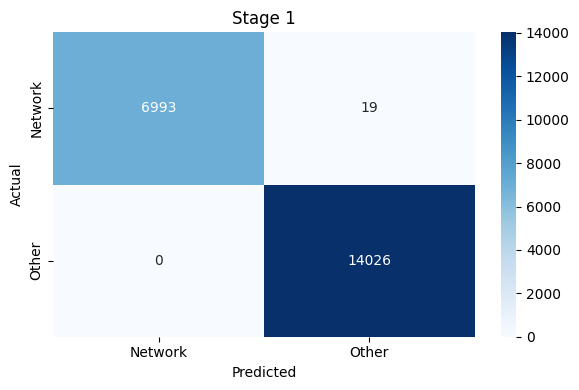

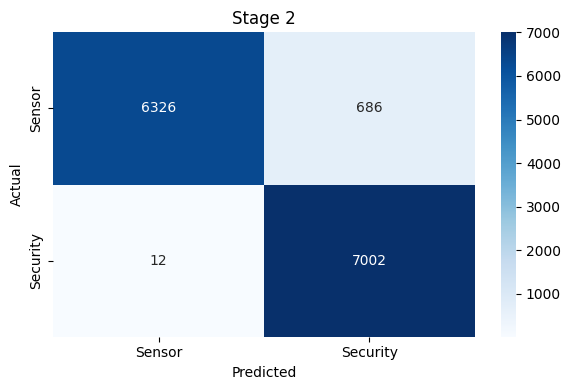

In [ ]:
plot_confusion(y_stage1, y1_pred, labels=["Network", "Other"], title="Stage 1")
plot_confusion(y_eval_stage2, y2_pred, labels=["Sensor", "Security"], title="Stage 2")


In [ ]:
import joblib

# Save XGBoost model
joblib.dump(clf_stage1, '/content/drive/My Drive/ColabData/classifier/xgboost_stage1_model.pkl')

# Save SVM model
joblib.dump(clf_stage2, '/content/drive/My Drive/ColabData/classifier/svm_stage2_model.pkl')


['/content/drive/My Drive/ColabData/svm_stage2_model.pkl']

In [ ]:
import joblib

# Load XGBoost model
clf_stage1 = joblib.load('/content/drive/My Drive/ColabData/classifier/xgboost_stage1_model.pkl')

# Load SVM model
clf_stage2 = joblib.load('/content/drive/My Drive/ColabData/classifier/svm_stage2_model.pkl')


In [ ]:
def classify_anomaly(input_row, autoencoder, clf_stage1, clf_stage2, threshold):

    import numpy as np

    # Ensure correct shape
    input_arr = np.array(input_row).reshape(1, -1)

    # Step 1: Autoencoder reconstruction
    reconstructed = autoencoder.predict(input_arr, verbose=0)
    error = np.mean(np.square(input_arr - reconstructed), axis=1)[0]

    # Step 2: Normal or Anomaly?
    if error < threshold:
        return "Normal"

    # Step 3: Compute error-based features
    error_features = np.array([
        np.mean((input_arr - reconstructed)**2),
        np.std((input_arr - reconstructed)**2),
        np.max((input_arr - reconstructed)**2),
        np.min((input_arr - reconstructed)**2)
    ]).reshape(1, -1)

    # Step 4: Stage 1 classification (Network vs Other)
    stage1_pred = clf_stage1.predict(error_features)[0]

    if stage1_pred == 0:
        return "Network"

    # Step 5: Stage 2 classification (Sensor vs Security)
    stage2_pred = clf_stage2.predict(input_arr)[0]

    if stage2_pred == 1:
        return "Security"
    elif stage2_pred == 2:
        return "Sensor"

    return "Unknown"


In [ ]:
test=df.iloc[2]

In [ ]:
test

,2
date_time,0.000000
T_data_1_1,-1.188861
T_data_1_2,-1.268196
T_data_1_3,-1.278983


In [ ]:
classify_anomaly(test, autoencoder, clf_stage1, clf_stage2, 3)

'Normal'